In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, time

import warnings
warnings.filterwarnings('ignore')

#import mpld3
#mpld3.enable_notebook()

In [2]:
#LPR data file
complete_file_path = 'Phase_I_II_wide_t0_t239_LPR_53_54_only.csv'

lpr_all_data = pd.read_csv(complete_file_path, header = 0)

In [3]:
display(lpr_all_data.head())
#display("lpr_all_data.shape:" + str(lpr_all_data.shape))
# Convert plate ids to ints
lpr_all_data['plate.id'] = (lpr_all_data['plate.id'].values).astype(int)
display(lpr_all_data)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289.0,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,9289.0,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,14.1,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6
2,53,9289.0,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9
3,53,9289.0,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,9289.0,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,13.7,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9


,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289,A01,53_9289.0_A01,50.00,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
1,53,9289,A02,53_9289.0_A02,35.60,7.2,0.0,0.0,0.0,0.000,...,14.100,15.2,17.3,17.5,10.6,13.400,9.100,11.2,11.7,10.6
2,53,9289,A03,53_9289.0_A03,11.20,0.0,0.0,0.0,0.0,0.000,...,0.000,13.9,12.9,0.0,11.5,12.900,9.200,13.1,3.0,7.9
3,53,9289,A04,53_9289.0_A04,5.00,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
4,53,9289,A05,53_9289.0_A05,1.00,0.0,0.0,0.0,0.0,0.000,...,13.700,18.1,7.1,10.3,8.3,17.500,12.300,13.9,10.8,15.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,54,12843,H08,54_12843.0_H08,3.56,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
380,54,12843,H09,54_12843.0_H09,1.12,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.800,1.608,0.0,0.0,0.0
381,54,12843,H10,54_12843.0_H10,0.50,0.0,0.0,0.0,0.0,1.216,...,4.684,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
382,54,12843,H11,54_12843.0_H11,0.10,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.261,0.000,0.0,0.0,0.0


In [4]:
np.unique(lpr_all_data.well)

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [5]:
unique_chemical_IDs = np.unique(lpr_all_data['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical
for chemical_ID in unique_chemical_IDs:
    lpr_data_subset = lpr_all_data.loc[lpr_all_data['chemical.id'] == chemical_ID]
    print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
    print('Plate IDs:', np.unique(lpr_data_subset['plate.id']))
    print('Number of unique plates:', len(np.unique(lpr_data_subset['plate.id'])))
    print('Concentrations tested:', np.unique(lpr_data_subset['conc']))
    print('Number of concentrations:', len(np.unique(lpr_data_subset['conc'])))
    print('Total number of wells:', lpr_data_subset.shape[0])
    for concentration_id in np.unique(lpr_data_subset['conc']):
        lpr_data_subset_concs = lpr_data_subset.loc[lpr_data_subset['conc'] == concentration_id]
        print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((lpr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((lpr_data_subset_concs['well']))}, ignore_index = True)


Plates/Wells/Concentration information about compound: 53
Plate IDs: [9289 9290]
Number of unique plates: 2
Concentrations tested: [ 0.   1.   5.  11.2 35.6 50. ]
Number of concentrations: 6
Total number of wells: 192
Number of wells for compound ID 53 and concentration 0.0 are 32
Number of wells for compound ID 53 and concentration 1.0 are 32
Number of wells for compound ID 53 and concentration 5.0 are 32
Number of wells for compound ID 53 and concentration 11.2 are 32
Number of wells for compound ID 53 and concentration 35.6 are 32
Number of wells for compound ID 53 and concentration 50.0 are 32

Plates/Wells/Concentration information about compound: 54
Plate IDs: [12838 12843]
Number of unique plates: 2
Concentrations tested: [0.   0.1  0.5  1.12 3.56 5.  ]
Number of concentrations: 6
Total number of wells: 192
Number of wells for compound ID 54 and concentration 0.0 are 32
Number of wells for compound ID 54 and concentration 0.1 are 32
Number of wells for compound ID 54 and concen

## Load morphological data for filtering wells that have dead fish

In [8]:
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/Phase_I_II/input/before_Lisa_cleanup/wide/344_zf_morphology_data_phase_1_and_2_-_2020JUNE25_wide_DNC_0.csv'
morphology_all_data = pd.read_csv(morph_data_file_complete_path, header = 0)
display(morphology_all_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,...,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data
lpr_all_data['Chemical_Plate_WELL'] = lpr_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
morphology_all_data['Chemical_Plate_WELL'] = morphology_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

morphology_nonna_data_plate_well = morphology_all_data.Chemical_Plate_WELL[~((morphology_all_data.MORT == 1) | (morphology_all_data.MORT.isnull()))]
lpr_filtered_data = lpr_all_data.loc[lpr_all_data['Chemical_Plate_WELL'].isin(list(morphology_nonna_data_plate_well.values))]

In [10]:
print(morphology_all_data.shape)
print(lpr_all_data.shape)
print(morphology_nonna_data_plate_well.shape)
print(lpr_filtered_data.shape)
display(morphology_nonna_data_plate_well[0:5])
display(lpr_all_data.Chemical_Plate_WELL[0:5])

(72784, 29)
(384, 246)
(59778,)
(325, 246)


1    53_9289_A02
2    53_9289_A03
3    53_9289_A04
4    53_9289_A05
6    53_9289_A07
Name: Chemical_Plate_WELL, dtype: object

0    53_9289_A01
1    53_9289_A02
2    53_9289_A03
3    53_9289_A04
4    53_9289_A05
Name: Chemical_Plate_WELL, dtype: object

In [ ]:
#(set(list(morphology_nonna_data_plate_well)) - set(list(lpr_all_data['Chemical_Plate_WELL'])))

In [10]:
#missmatched_data = (set(list(morphology_all_data['Chemical_Plate_WELL'])) - set(list(lpr_all_data['Chemical_Plate_WELL'])))
#with open('chemicals_difference_morph_t0_t239_behav.txt', 'w') as filehandle:
#    for listitem in missmatched_data:
#        filehandle.write('%s\n' % listitem)

In [11]:
lpr_filtered_data.head()

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
1,53,9289,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6,53_9289_A02
2,53,9289,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9,53_9289_A03
3,53,9289,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53_9289_A04
4,53,9289,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9,53_9289_A05
6,53,9289,A07,53_9289.0_A07,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,53_9289_A07


In [12]:
# Convert time resolution to minutes (if applicable)
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields
lpr_filtered_data_minute = lpr_filtered_data[['chemical.id', 'conc', 'plate.id', 'well']]
time_index_sec_start = 5
max_time_index_sec = 240

group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
for time_index in range(int(max_time_index_sec / group_size)):
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    lpr_minutes = pd.DataFrame(np.sum(lpr_filtered_data.iloc[:,start_index:end_index], axis = 1))
    lpr_minutes.columns = ['t' + str(time_index)]
    #lpr_minutes.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    lpr_filtered_data_minute = pd.concat([lpr_filtered_data_minute, lpr_minutes], axis = 1)
pd.set_option('display.max_columns', None)
lpr_filtered_data_minute.head()

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
1,53,35.6,9289,A02,7.2,0.0,0.0,167.2,132.2,124.7,12.7,0.0,0.0,130.9,117.2,125.3,50.5,0.0,0.0,30.4,0.0,127.2,110.5,13.7,11.2,27.1,120.4,130.7
2,53,11.2,9289,A03,0.0,0.0,0.8,1.8,19.2,17.3,4.7,5.4,5.3,28.4,26.2,4.4,41.3,0.0,0.0,10.9,28.6,40.4,71.0,11.4,1.2,0.0,72.9,84.4
3,53,5.0,9289,A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,1.0,9289,A05,0.0,17.1,1.8,162.2,110.3,86.0,33.6,0.0,0.0,100.9,101.3,102.0,59.1,0.0,0.0,17.0,128.1,111.7,112.0,64.0,0.0,0.0,90.0,127.9
6,53,50.0,9289,A07,0.0,0.0,1.0,27.9,83.0,174.9,9.4,6.6,0.0,32.5,67.8,33.1,69.7,0.0,9.8,28.6,6.4,61.8,8.7,24.4,12.5,1.4,51.5,6.5


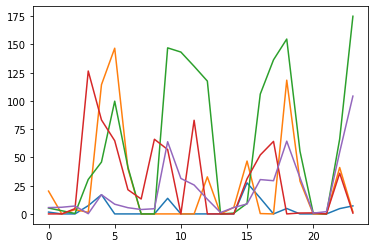

In [13]:
# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4
num_time_points = 25

fig, ax = plt.subplots()
ax.plot(np.transpose(lpr_filtered_data_minute.iloc[10:15,time_index_start:time_index_start + num_time_points].values));

In [14]:
delta_mov_auc = lpr_filtered_data_minute[['chemical.id', 'conc', 'plate.id', 'well']].copy()
transition_points = [2]
num_light = 3
num_dark = 3
for transition_index, transition_point in enumerate(transition_points):
    delta_mov_auc['MOV' + str(transition_index + 1)] = lpr_filtered_data_minute['t' + str(transition_point + 1)] - lpr_filtered_data_minute['t' + str(transition_point)]
    delta_mov_auc['AUC' + str(transition_index + 1)] = sum(lpr_filtered_data_minute['t' + str(transition_point + 1 + index_count)] for index_count in range(num_dark)) - sum(lpr_filtered_data_minute['t' + str(transition_point - index_count)] for index_count in range(num_light))
    
display(delta_mov_auc.head())  

,chemical.id,conc,plate.id,well,MOV1,AUC1
1,53,35.6,9289,A02,167.2,416.9
2,53,11.2,9289,A03,1.0,37.5
3,53,5.0,9289,A04,0.0,0.0
4,53,1.0,9289,A05,160.4,339.6
6,53,50.0,9289,A07,26.9,284.8


In [15]:
import generate_dose_response_be as gdr
#import generate_dose_response_newest_no_avg as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [19]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1
1,53,35.6,9289,A02,167.2,416.9
2,53,11.2,9289,A03,1.0,37.5
3,53,5.0,9289,A04,0.0,0.0
4,53,1.0,9289,A05,160.4,339.6
6,53,50.0,9289,A07,26.9,284.8


In [20]:
display(delta_mov_auc.tail())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1
378,54,5.00,12843,H07,65.115,393.348
380,54,1.12,12843,H09,59.559,62.071
381,54,0.50,12843,H10,49.110,80.469
382,54,0.10,12843,H11,7.409,-4.342
383,54,0.00,12843,H12,13.217,12.753


In [17]:
start_time = time.time()

end_points = ['MOV1','AUC1']
#for chemical_id in np.unique(delta_mov_auc['Chemical.ID']):
#for chemical_id in [53,54,56,57]:
for chemical_id in [54]:
    print("chemical_id:" + str(chemical_id))
    for end_point in end_points:
        print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))

        dose_response = gdr.gen_dose_response(delta_mov_auc_end_point_chemical_id, end_point)
        print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
                    
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# for all combinations of 1 chemical (54) and 2 endpoints (['MOV1','AUC1']), 70 seconds took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()

chemical_id:54
end_point:MOV1
delta_mov_auc_end_point_chemical_id:
     Chemical.ID  CONC  Plate WELL    MOV1
194           54  1.12  12838  A03  17.748
195           54  0.50  12838  A04  35.800
196           54  0.10  12838  A05  23.511
200           54  1.12  12838  A09   0.204
201           54  0.50  12838  A10  24.562
..           ...   ...    ...  ...     ...
378           54  5.00  12843  H07  65.115
380           54  1.12  12843  H09  59.559
381           54  0.50  12843  H10  49.110
382           54  0.10  12843  H11   7.409
383           54  0.00  12843  H12  13.217

[141 rows x 5 columns]
dose_response:
   dose  num_affect  num_embryos
0  0.00         1.0         26.0
1  0.10         9.0         30.0
2  0.50         8.0         31.0
3  1.12         8.0         25.0
4  3.56         4.0         18.0
5  5.00         3.0         11.0
logistic
start_params [alpha, beta]: [-1.63882282  0.95651138]
Model Convergence: True
Fit Paramas:[-1.267422324692622, 0.0671589067363731]
BMD 10:

/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarnin

BMDL Convergence: False
BMDL: NaN

weibull
start_params [g, alpha, beta]: [0.1 array([-0.04951761]) array([0.31865577])]
Model Convergence: True
Fit Paramas:[0.03846166159658329, 1e-05, 0.28687178374225897]
BMD 10: 0.0
BMD 50: inf
Estimating BMDL ...
BMDL Convergence: False
BMDL: NaN

log_logistic
start_params [g, alpha, beta]: [1.00000000e-01 8.22239523e-04 1.28269256e+00]
Model Convergence: True
Fit Paramas:[1e-05, -0.9310830028657826, 0.09657351413403066]
BMD 10: 2.0235638375803616e-06
BMD 50: 15385.54682562431
Estimating BMDL ...


/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarnin

BMDL Convergence: False
BMDL: NaN

probit
start_params [alpha, beta]: [-1.76882504  0.23284794]
Model Convergence: True
Fit Paramas:[-0.7741851181286256, 0.040143703395883405]
BMD 10: 6.040621496796789
BMD 50: 26.224193077030826
Estimating BMDL ...
BMDL Convergence: True
BMDL: 1.7178201726654319

log_probit
start_params [g, alpha, beta]: [0.1        0.52276409 0.01636425]
Model Convergence: True
Fit Paramas:[1e-05, -0.5743361149646383, 0.05296892628350204]
BMD 10: 1.5904148016478653e-06
BMD 50: 51168.921178970035
Estimating BMDL ...


/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarnin

BMDL Convergence: False
BMDL: NaN

multistage_2
start_params [g, beta 1, beta 2]: [ 0.05        0.31258891 -0.05328276]
Model Convergence: True
Fit Paramas:[0.21719484566918007, 0.01885293001517748, 1e-09]
BMD 10: 5.588546944657047
BMD 50: 36.76594716520154
Estimating BMDL ...
bmdl_mid_val: 3.0737008195613758
BMDL Convergence: False
BMDL: NaN

quantal_linear
start_params [g, beta]: [0.1        0.84203991]
Model Convergence: True
Fit Paramas:[0.21719580821082618, 0.018852147412897143]
BMD 10: 5.588780596196005
BMD 50: 36.76754511720765
Estimating BMDL ...
BMDL Convergence: True
BMDL: 1.2587633323100342

46
46
end_point:AUC1
delta_mov_auc_end_point_chemical_id:
     Chemical.ID  CONC  Plate WELL     AUC1
194           54  1.12  12838  A03   24.147
195           54  0.50  12838  A04   -4.519
196           54  0.10  12838  A05   73.699
200           54  1.12  12838  A09   -4.966
201           54  0.50  12838  A10   75.152
..           ...   ...    ...  ...      ...
378           54  5.00  

/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


BMDL Convergence: True
BMDL: 0.0038897344476491826

weibull
start_params [g, alpha, beta]: [0.1 array([-0.0533962]) array([0.29769238])]
Model Convergence: True
Fit Paramas:[0.038461687869982567, 1e-05, 0.26306129751487367]
BMD 10: 0.0
BMD 50: inf
Estimating BMDL ...
BMDL Convergence: False
BMDL: NaN

log_logistic
start_params [g, alpha, beta]: [1.00000000e-01 8.22239523e-04 1.28269256e+00]
Model Convergence: True
Fit Paramas:[1e-05, -1.0236225820674196, 0.09088525745303981]
BMD 10: 2.465767782158404e-06
BMD 50: 77870.39716984189
Estimating BMDL ...


/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverti

BMDL Convergence: False
BMDL: NaN

probit
start_params [alpha, beta]: [-1.76882504  0.23284794]
Model Convergence: True
Fit Paramas:[-0.823890876166516, 0.04218185791260198]
BMD 10: 6.030272204854798
BMD 50: 25.691502089722213
Estimating BMDL ...
BMDL Convergence: True
BMDL: 1.7730119180436115

log_probit
start_params [g, alpha, beta]: [0.1        0.52276409 0.01636425]
Model Convergence: True
Fit Paramas:[1e-05, -0.6292259191050057, 0.04974959172530637]
BMD 10: 2.0204689889969202e-06
BMD 50: 311097.28723858966
Estimating BMDL ...


/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarnin

BMDL Convergence: False
BMDL: NaN

multistage_2
start_params [g, beta 1, beta 2]: [ 0.05        0.25917301 -0.04181349]
Model Convergence: True
Fit Paramas:[0.20361161083010096, 0.017861752133064433, 1e-09]
BMD 10: 5.898664367717799
BMD 50: 38.806141159850036
Estimating BMDL ...
bmdl_mid_val: 3.244265402244789
BMDL Convergence: False
BMDL: NaN

quantal_linear
start_params [g, beta]: [0.1        0.84203991]
Model Convergence: True
Fit Paramas:[0.20361161048833062, 0.017861768415564354]
BMD 10: 5.898660939194433
BMD 50: 38.80619009459063
Estimating BMDL ...
BMDL Convergence: True
BMDL: 1.3415997390023278



/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kimd999/bin/miniconda3/envs/tox/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


46
46
Done, it took:70.4 seconds


In [21]:
np.exp((np.log(0.1/(1-0.1)) - 0.00088637)/0.03373856)

5.071672098544112e-29